## Figure 6. Element activity in TAp63B overexpression cell line

In [4]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os
import numpy as np
from statannotations.Annotator import Annotator
import warnings
warnings.filterwarnings('ignore')
#set seaborn theme for nice figures
sns.set_theme(style="ticks",rc={"axes.spines.right": False, "axes.spines.top": False, 'font.size':10}, font='arial')
act_palette = {'Activating': sns.color_palette('RdYlBu')[-1], 'Repressing':sns.color_palette('RdYlBu')[0],
			   'Unchanged':sns.color_palette('RdGy')[4]}
#import key tables
os.chdir('..\data')
fig_out_path = r'..\figures'
df_fc_tap63b = pd.read_csv('p63enh_starrseq_log2fc_matched_MCF10A_GUSTAp63B_WTmut.csv', index_col=0)
df = pd.read_excel('Table S3.xlsx', sheet_name='MCF10A_GUS_TAp63B')
df.sample(5)

,loc,enhancer_variant,cell_line,RNA/DNA,activity,obs_score,p63RE_class,strand,p63RE_type,gc,obs_p53
21175,chr10_8225037_8225056,mut,GUS,0.928242,Repressing,10,primary,+,p53RE+p63RE,51.260504,NaN
3592,chr16_49702895_49702909,WT,GUS,0.312157,Repressing,14,tertiary,-,Unique p63RE,57.500000,NaN
29,chr10_80619243_80619262,WT,GUS,3.383853,Activating,20,primary,+,p53RE+p63RE,55.462185,16.0
33956,chr19_36150195_36150209,WT,TAp63B,1.406129,Unchanged,11,tertiary,+,Unique p63RE,65.000000,NaN
12751,chr4_102201197_102201221,WT,GUS,0.521607,Unchanged,8,primary,-,Unique p63RE,55.000000,NaN


## Figure 6D.

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

GUS_WT vs. TAp63β_WT: Wilcoxon test (paired samples), P_val:3.166e-208 Stat=3.179e+07


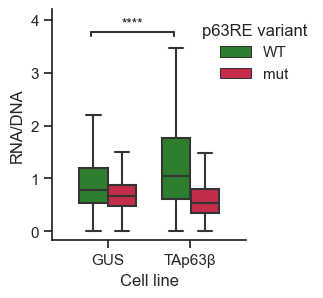

In [5]:
fig, ax = plt.subplots(figsize=(2.5,3))
df = df[df.enhancer_variant.isin(['WT', 'mut'])]
df.replace({'TAp63B':'TAp63β', 'pGus':'GUS'}, inplace=True)
cols = {'WT':'forestgreen', 'mut':'crimson'}
compare = [[('GUS','WT'),('TAp63β','WT')]]
sns.boxplot(data = df, x = 'cell_line',y = 'RNA/DNA',hue = 'enhancer_variant', width=0.7, palette = cols, showfliers = False, ax=ax).set(xlabel='Cell line')
annotator = Annotator(pairs = compare, data = df, x = 'cell_line',y = 'RNA/DNA',hue = 'enhancer_variant', ax=ax)
annotator.configure(test = "Wilcoxon").apply_and_annotate()
ax.legend(frameon = False, title = 'p63RE variant')
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.7, 1))
fig.savefig(os.path.join(fig_out_path,'6D.eps'), dpi=300, transparent=True, bbox_inches='tight')

In [6]:
#check numbers
df_fc_tap63b.value_counts(subset=['cell_line', 'activity','p63RE_type'])

cell_line  activity    p63RE_type  
GUS        Unchanged   Unique p63RE    4945
TAp63B     Activating  p53RE+p63RE     4888
                       Unique p63RE    4278
GUS        Activating  p53RE+p63RE     3116
TAp63B     Unchanged   Unique p63RE    2906
GUS        Unchanged   p53RE+p63RE     2674
           Activating  Unique p63RE    1399
TAp63B     Unchanged   p53RE+p63RE     1294
GUS        Repressing  Unique p63RE     956
                       p53RE+p63RE      442
TAp63B     Repressing  Unique p63RE     116
                       p53RE+p63RE       50
dtype: int64

## Figure 6E.

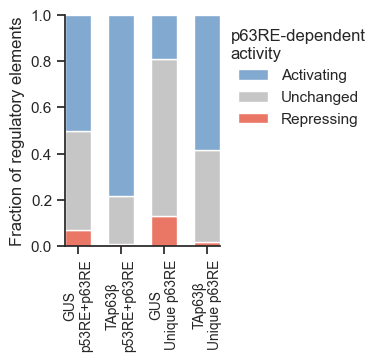

In [7]:
#separate into 4 groups and label them
fig, ax = plt.subplots(figsize=(2,3))
df_fc_tap63b['xlabel'] = df_fc_tap63b.apply(lambda row: row.cell_line + '\n' + row.p63RE_type, axis='columns')
df_fc_tap63b.replace({'TAp63B\np53RE+p63RE':'TAp63β\np53RE+p63RE','TAp63B\nUnique p63RE':'TAp63β\nUnique p63RE','pGus\np53RE+p63RE':'GUS\np53RE+p63RE','pGus\nUnique p63RE':'GUS\nUnique p63RE',}, inplace=True)
df_fc_tap63b['xlabel'] = pd.Categorical(df_fc_tap63b['xlabel'], ['GUS\np53RE+p63RE','TAp63β\np53RE+p63RE','GUS\nUnique p63RE','TAp63β\nUnique p63RE'])
sns.histplot(
    data=df_fc_tap63b,
    x="xlabel", hue="activity", hue_order=['Activating', 'Unchanged','Repressing'],
    multiple="fill", stat="percent", palette= act_palette,
    discrete=True, shrink=.6,ax=ax).set(ylabel = 'Fraction of regulatory elements',xlabel=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, size=10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.98, 1), frameon=False, title = 'p63RE-dependent\nactivity')
fig.savefig(os.path.join(fig_out_path,'6E.pdf'), dpi=300, transparent=True, bbox_inches='tight')